<a href="https://colab.research.google.com/github/tanviagwl98/99-ML-Learning-Projects/blob/ML-contribution/health_insurance_cross_sell_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [44]:
trainData = pd.read_csv('train.csv')
trainData.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [45]:
testData = pd.read_csv('test.csv')
testData.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [46]:
trainData = trainData.drop(['id'], axis = 1)
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [47]:
testData = testData.drop(['id'], axis = 1)
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                127037 non-null  object 
 1   Age                   127037 non-null  int64  
 2   Driving_License       127037 non-null  int64  
 3   Region_Code           127037 non-null  float64
 4   Previously_Insured    127037 non-null  int64  
 5   Vehicle_Age           127037 non-null  object 
 6   Vehicle_Damage        127037 non-null  object 
 7   Annual_Premium        127037 non-null  float64
 8   Policy_Sales_Channel  127037 non-null  float64
 9   Vintage               127037 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 9.7+ MB


In [48]:
#Checking for null values
print(trainData.isnull().sum())
print(" ")
print(testData.isnull().sum())

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64
 
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64


No value is null

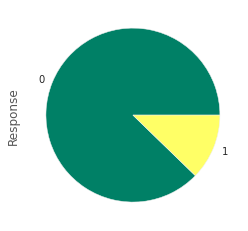

In [49]:
trainData["Response"].value_counts().plot.pie(colormap = "summer")

In [50]:
#Getting data in numerical entities

###Gender
def Gender(gen):
    if gen == 'Female':
        return 1
    else:
        return 0
trainData['Gender'] = trainData['Gender'].apply(Gender)
testData['Gender'] = testData['Gender'].apply(Gender)

###Vehicle Age
def VehicleAge(age):
    if age == '<1':
        return 0
    elif age == '1-2':
        return 1
    else:
        return 2
trainData['Vehicle_Age'] = trainData['Vehicle_Age'].apply(VehicleAge)    
testData['Vehicle_Age'] = testData['Vehicle_Age'].apply(VehicleAge)    

###Vehicle Damage
def VehicleDamage(damage):
    if damage == 'Yes':
        return 1
    else:
        return 0
trainData['Vehicle_Damage'] = trainData['Vehicle_Damage'].apply(VehicleDamage)
testData['Vehicle_Damage'] = testData['Vehicle_Damage'].apply(VehicleDamage)


In [51]:
trainData = trainData.drop(['Driving_License'], axis = 1)
trainData.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,3.0,0,2,0,33536.0,26.0,183,0
2,0,47,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,11.0,1,2,0,28619.0,152.0,203,0
4,1,29,41.0,1,2,0,27496.0,152.0,39,0


In [52]:
testData= testData.drop(['Driving_License'], axis=1)
testData.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,25,11.0,1,2,0,35786.0,152.0,53
1,0,40,28.0,0,2,1,33762.0,7.0,111
2,0,47,28.0,0,2,1,40050.0,124.0,199
3,0,24,27.0,1,2,1,37356.0,152.0,187
4,0,27,28.0,1,2,0,59097.0,152.0,297


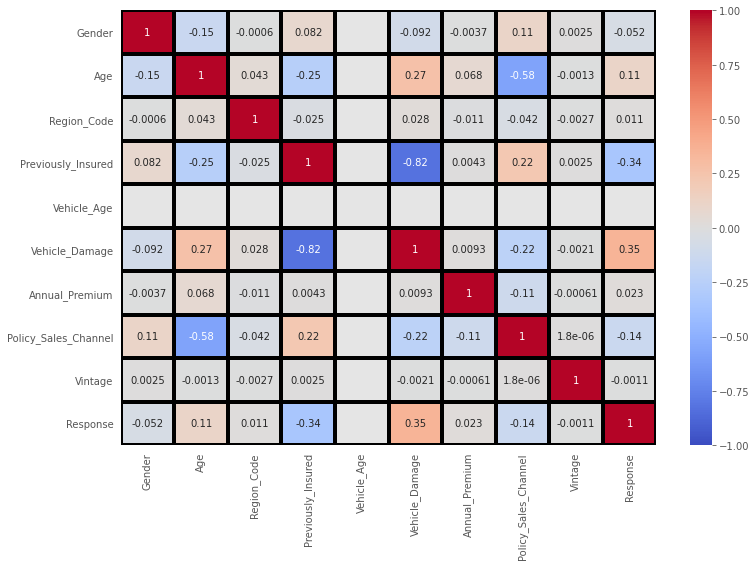

In [53]:
plt.figure(figsize=(12, 8))
sns.heatmap(trainData.corr(), annot=True,vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

**I am figuring out this correlation matrix still, why is this showing such matrix with no visibility for Vehicle_Age**

In [54]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score,recall_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.utils.multiclass import type_of_target

from sklearn.neighbors import KNeighborsClassifier

In [55]:
from sklearn import preprocessing

In [56]:
numCols = ['Age','Region_Code', 'Policy_Sales_Channel', 'Vintage' ]
scaler = StandardScaler()
trainData[numCols] = scaler.fit_transform(trainData[numCols])

In [57]:
scalerM = MinMaxScaler()
trainData[["Annual_Premium"]] = scalerM.fit_transform(trainData[["Annual_Premium"]])

In [58]:
x = trainData.drop(["Response"], axis = 1)
y = trainData["Response"]

In [59]:
x = x.values.astype(np.float64)
y = y.values.astype(np.float64)

In [60]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.4, random_state = 42 )

In [61]:
model = KNeighborsClassifier(n_neighbors = 11, weights = "uniform")
model.fit(xTrain,yTrain)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [62]:
np.isnan(xTest.any())

False

In [63]:
np.isfinite(xTest.all())

True

In [65]:
y_pred = model.predict(xTest)
accuracy_score(yTest, y_pred)

0.8663050038046758

In [66]:
roc_auc_score(yTest, y_pred, average = 'weighted')

0.5374585447904939